In [1]:
# Importing multiple library to read, analysis and visualization the dataset 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
Iris_dataset=pd.read_csv("../input/iriscsv/iris.csv")

In [3]:
# Reading the Iris.csv file 
Iris_dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Some basic information of dataset 

In [4]:
Iris_dataset.info()
Iris_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
Iris_dataset.head(10) # Top 10 rows of this Iris_dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [6]:
#Describe function give the basic numerical info about for each numeric function ...
Iris_dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Data points count for each class labels..
Iris_dataset.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

## Visualization of Data

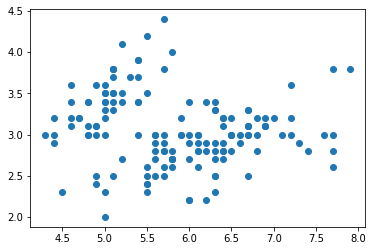

In [8]:
# Visualization the dataset features to find pattern to solve our task
plt.scatter(Iris_dataset['sepal.length'],Iris_dataset['sepal.width'])
plt.show()

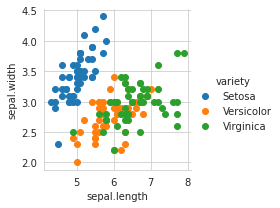

In [9]:
# using seaborn lib to visulaization 2  features based on target variable.
sns.set_style('whitegrid')
sns.FacetGrid(Iris_dataset, hue ='variety')\
    .map(plt.scatter, 'sepal.length', 'sepal.width')\
    .add_legend()
plt.show()

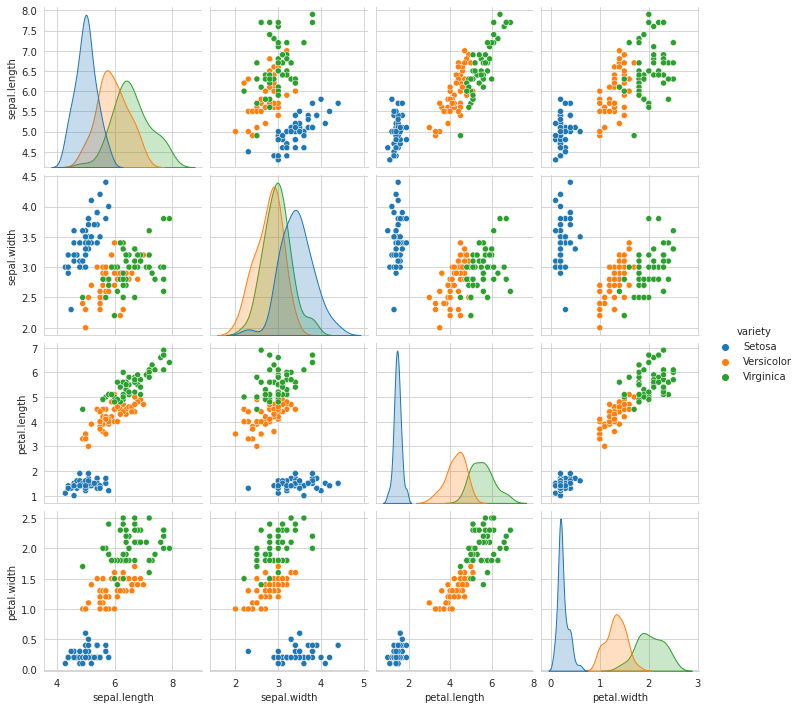

In [10]:
 # Pair plot the relationship b/w all features distribution with each other.
sns.pairplot(Iris_dataset, hue='variety')
plt.show()

In [11]:
x = Iris_dataset.iloc[:,:4]
print(x)

     sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [12]:
y = Iris_dataset.iloc[:,4:]
print(y)

       variety
0       Setosa
1       Setosa
2       Setosa
3       Setosa
4       Setosa
..         ...
145  Virginica
146  Virginica
147  Virginica
148  Virginica
149  Virginica

[150 rows x 1 columns]


In [13]:
classify_ = tree.DecisionTreeClassifier()

In [14]:
classify = classify_.fit(x,y)
print(classify)

DecisionTreeClassifier()


In [15]:
prediction_ = classify.predict([[5.1,3.5,1.4,0.2]])
print(prediction_)

['Setosa']


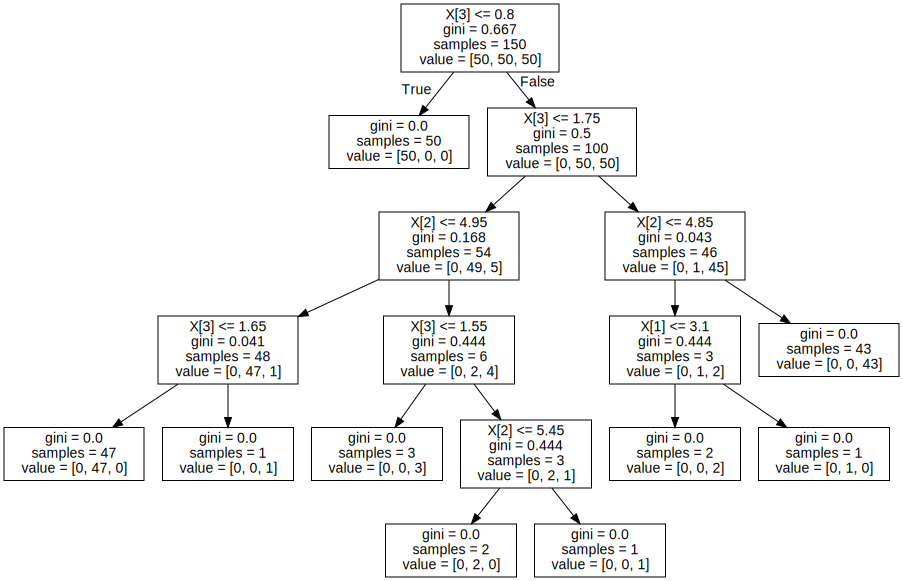

<Figure size 1080x720 with 0 Axes>

In [16]:
plt.figure(figsize=(15,10))
Figure = tree.export_graphviz(classify_, out_file=None)
graph = graphviz.Source(Figure)
graph

In [17]:
# plt.figure(figsize=(15,10))
# tree.plot_tree(classify,filled=True)
# plt.show()

In [18]:
# As our model has been trained...
# Now we can validate our Decision tree using cross validation method to get accuracy or performance score of our model
print('Accuracy score is: ',cross_val_score(classify_,x,y,cv=3, scoring='accuracy').mean())

Accuracy score is:  0.96


In [19]:
# #checking validation test data on my trained model and getting performance metrices
# y_hat = classify.predict(x)
# print('Acuracy score for validation test data is: ', accuracy_score(y, y_hat))
# multilabel_confusion_matrix(y,y_hat)


[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

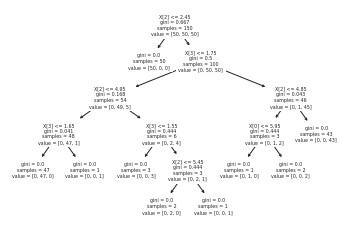

In [20]:
# Training Model on Actual train data..
Iris_Fclf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
Iris_Fclf.fit(x, y)
tree.plot_tree(Iris_Fclf)

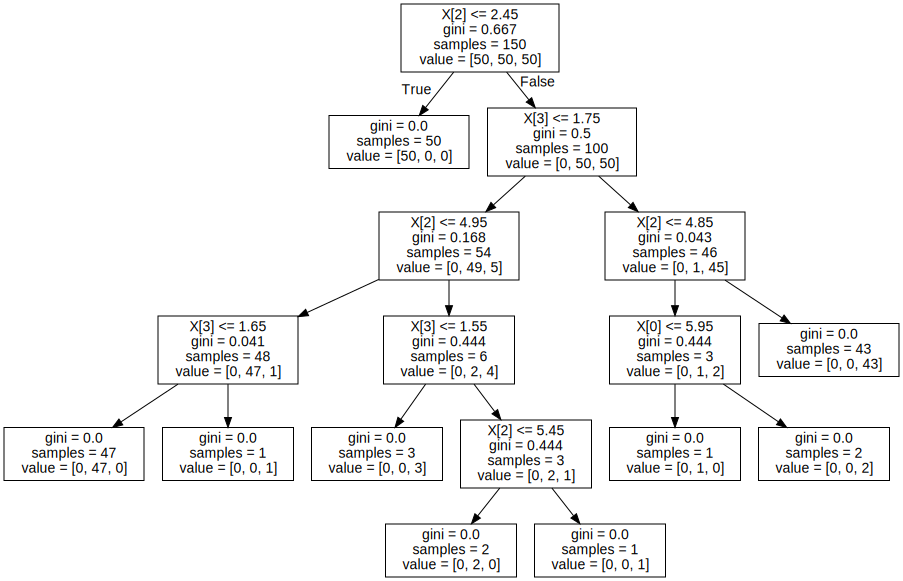

In [21]:
clf_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(clf_data)
graph

In [ ]:
# Thank You!